In [2]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [24]:
bream_df = df.loc[df['Species'] == 'Bream']

bream_length = bream_df['Length2'].tolist()
bream_weight = bream_df['Weight'].tolist()
#.tolist()로 리스트 생성

In [17]:
#차트를 시각화해서 점찍어보기
#matplotlib library 를 설치해서 시각화하기 - 터미널에 (vscode)

#산점도 확인하기

In [18]:
#bream_length

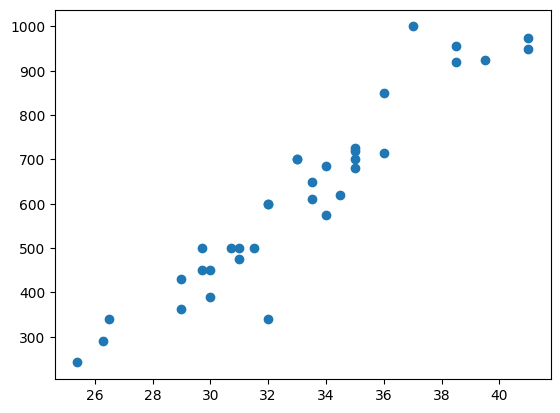

In [46]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)

In [26]:
smelt_df = df.loc[df['Species'] == 'Smelt']
# smelt_df.head()

smelt_length = smelt_df['Length2'].tolist()
smelt_weight = smelt_df['Weight'].tolist()

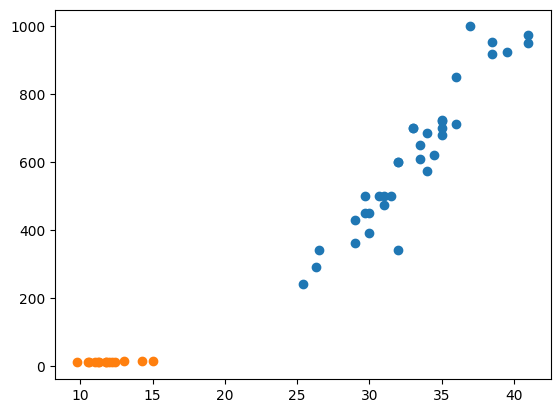

In [27]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_length)

# KNN (K-Neareat Neighbours): K-최근접 이웃 알고리즘

In [28]:
length = bream_length + smelt_length
weight = bream_length + smelt_length
#2차원 데이터를 만들어야된다. -> scikit-learn 사이킷런 (머신러닝 패키지/ 라이브러리)를 사용하기 위해
# => 우리의 목표: zip을 통해 (length, weight)의 정보를 가진 리스트를 만들어준다. 

In [29]:
list(zip(length, weight))
#tuple튜플로 되어있어서, list리스트로 바꿔주기 위해 다시 아래 과정을 거쳤다. 

[(25.4, 25.4),
 (26.3, 26.3),
 (26.5, 26.5),
 (29.0, 29.0),
 (29.0, 29.0),
 (29.7, 29.7),
 (29.7, 29.7),
 (30.0, 30.0),
 (30.0, 30.0),
 (30.7, 30.7),
 (31.0, 31.0),
 (31.0, 31.0),
 (31.5, 31.5),
 (32.0, 32.0),
 (32.0, 32.0),
 (32.0, 32.0),
 (33.0, 33.0),
 (33.0, 33.0),
 (33.5, 33.5),
 (33.5, 33.5),
 (34.0, 34.0),
 (34.0, 34.0),
 (34.5, 34.5),
 (35.0, 35.0),
 (35.0, 35.0),
 (35.0, 35.0),
 (35.0, 35.0),
 (36.0, 36.0),
 (36.0, 36.0),
 (37.0, 37.0),
 (38.5, 38.5),
 (38.5, 38.5),
 (39.5, 39.5),
 (41.0, 41.0),
 (41.0, 41.0),
 (9.8, 9.8),
 (10.5, 10.5),
 (10.6, 10.6),
 (11.0, 11.0),
 (11.2, 11.2),
 (11.3, 11.3),
 (11.8, 11.8),
 (11.8, 11.8),
 (12.0, 12.0),
 (12.2, 12.2),
 (12.4, 12.4),
 (13.0, 13.0),
 (14.3, 14.3),
 (15.0, 15.0)]

In [30]:
fish_data = [ [l, w] for l, w in zip(length, weight)]
fish_data

[[25.4, 25.4],
 [26.3, 26.3],
 [26.5, 26.5],
 [29.0, 29.0],
 [29.0, 29.0],
 [29.7, 29.7],
 [29.7, 29.7],
 [30.0, 30.0],
 [30.0, 30.0],
 [30.7, 30.7],
 [31.0, 31.0],
 [31.0, 31.0],
 [31.5, 31.5],
 [32.0, 32.0],
 [32.0, 32.0],
 [32.0, 32.0],
 [33.0, 33.0],
 [33.0, 33.0],
 [33.5, 33.5],
 [33.5, 33.5],
 [34.0, 34.0],
 [34.0, 34.0],
 [34.5, 34.5],
 [35.0, 35.0],
 [35.0, 35.0],
 [35.0, 35.0],
 [35.0, 35.0],
 [36.0, 36.0],
 [36.0, 36.0],
 [37.0, 37.0],
 [38.5, 38.5],
 [38.5, 38.5],
 [39.5, 39.5],
 [41.0, 41.0],
 [41.0, 41.0],
 [9.8, 9.8],
 [10.5, 10.5],
 [10.6, 10.6],
 [11.0, 11.0],
 [11.2, 11.2],
 [11.3, 11.3],
 [11.8, 11.8],
 [11.8, 11.8],
 [12.0, 12.0],
 [12.2, 12.2],
 [12.4, 12.4],
 [13.0, 13.0],
 [14.3, 14.3],
 [15.0, 15.0]]

In [31]:
#정답 데이터를 만들어야한다. 
#머신러닝은 물론이고 컴퓨터 프로그램은 문자를 직접 이해하지 못하므로
#정답을 이진분류로 0혹은 1을 알려줘. 정답을 학습시킨다. 
#도미를 1로, 빙어를 0으로

In [32]:
# fish_target = [1] ** 35 + [0] * 14
#위는 썩좋지 못한 방법
#데이터는 언제나 변할 수 있으므로,아래와 같이 길이len을 통해 
fish_target = [1] * len(bream_weight) + [0] * len(smelt_weight)
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## KNN 알고리즘

In [36]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#SciKit 라이브러리를 통해 (vscode에서 install 설치를 하고) -> 아래와 같이 내가 사용할
#KNeighborsClassifier 알고리즘 기능을 불러와 사용해보겠다.


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
kn = KNeighborsClassifier()

In [37]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [38]:
kn.score(fish_data, fish_target)
#확륧: 1.0 은 다 맞췄다를 의미
#정확도 (accuracy)

1.0

In [45]:
# kn.predict([[30, 600]])
#도미 bream 을 1이라고 학습 시켰기 때문에 => 1을 반환하면, 도미bream라는 정답을 낸 것
kn.predict([[12, 19]])

array([0])

In [52]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [53]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143